In [87]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [88]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [89]:
data_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [90]:
data_df['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
D                  3
F2                 3
C22 C26            3
E101               3
F33                3
D36                2
C124               2
B22                2
C123               2
B20                2
C83                2
C2                 2
E44                2
E24                2
C65                2
C52                2
C92                2
D26                2
B57 B59 B63 B66    2
F G73              2
F4                 2
B77                2
E67                2
C78                2
C126               2
B49                2
D33                2
                  ..
D6                 1
B3                 1
B94                1
C46                1
E10                1
C90                1
D50                1
A20                1
E68                1
C87                1
A24                1
B82 B84            1
C45                1
A14                1
C110               1
D11                1
C30          

In [91]:
data_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

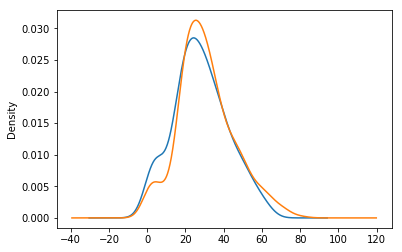

In [92]:
data_df.groupby('Sex').Age.plot(kind='kde')

## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [93]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [94]:
y_data = data_df[['Survived']]
y_data.head(3)

,Survived
0,0
1,1
2,1


In [95]:
data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
data_df.shape

(891, 12)

In [97]:
data_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [98]:
data_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [99]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [100]:
x_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [101]:
# # 기본적인 결측치 채우는 방법
mean_age = x_data['Age'].median(skipna=True)
x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [102]:
x_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
del x_data['PassengerId']
del x_data['SibSp']
del x_data['Parch']
del x_data['Ticket']
del x_data['Fare']
del x_data['Cabin']
del x_data['Name']

In [138]:
x_data['Embarked'] = x_data['Embarked'].fillna("S")

In [139]:
x_data["Embarked"].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [140]:
sex=x_data["Sex"].apply(lambda x: 1 if x=='male' else 0)
x_data['Sex']=sex

In [141]:
x_data['Sex'].value_counts()

0    891
Name: Sex, dtype: int64

In [142]:
x_data['age_group']=pd.cut(x=x_data['Age'], bins=[0,20,30,40,50,80], labels=[0,1,2,3,4])

In [143]:
x_data['age_group'].isna().sum()

0

In [144]:
emb=x_data['Embarked'].apply(lambda x: 0 if x=='S' else (1 if x=='C'else 2 ))
x_data['Embarked']=emb

In [145]:
X=x_data[['Pclass','Sex','age_group','Embarked']]
y= data_df[['Survived']]

In [146]:
(X.shape, y.shape)

((891, 4), (891, 1))

In [147]:
X.head(2)

,Pclass,Sex,age_group,Embarked
0,3,0,1,2
1,1,0,2,2


In [148]:
y.head(2)

,Survived
0,0
1,1


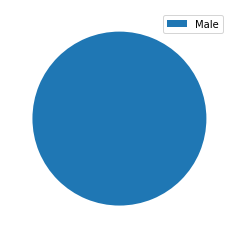

In [149]:
from matplotlib import pyplot as plt
data=x_data['Sex'].value_counts()
categories = ['Male','Female']
plt.pie(data)
plt.legend(categories)
plt.show()

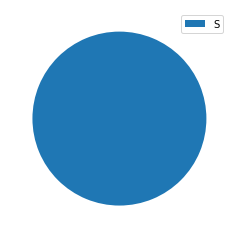

In [150]:
from matplotlib import pyplot as plt
data=x_data['Embarked'].value_counts()
categories = ['S','C','Q']
plt.pie(data)
plt.legend(categories)
plt.show()

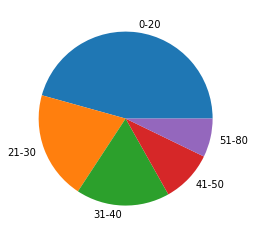

In [213]:
data=x_data['age_group'].value_counts()
categories = ['0-20','21-30','31-40','41-50','51-80']
plt.pie(data, labels=categories)
plt.show()

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, stratify=y)

In [153]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 4) (268, 4) (623, 1) (268, 1)


In [154]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categories='auto')
print(ohe)

#fit
ohe_cat_vars=ohe.fit_transform(X).toarray()
print(ohe_cat_vars.shape)
ohe_cat_vars[:]

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)
(891, 10)


array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [155]:
feature_names= ohe.get_feature_names()
feature_names

array(['x0_1', 'x0_2', 'x0_3', 'x1_0', 'x2_0', 'x2_1', 'x2_2', 'x2_3',
       'x2_4', 'x3_2'], dtype=object)

In [156]:
x0: pclass x0_1: 1등급, x0_2
x1: sex
x2: age
x3: embarked

SyntaxError: invalid syntax (<ipython-input-156-95f0cd97da0c>, line 1)

In [157]:
headers=list(X.columns.values)

for each in headers:
    print(f"{each}\t unique values: {sorted(set(X[each]))}")

Pclass	 unique values: [1, 2, 3]
Sex	 unique values: [0]
age_group	 unique values: [0, 1, 2, 3, 4]
Embarked	 unique values: [2]


In [158]:
label=['Survived']
for each in label:
    print(f"{each}\t unique values: {sorted(set(y[each]))}")

Survived	 unique values: [0, 1]


In [159]:
len(feature_names)

10

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

def five_fold_CV(clf, params, x, y):
    cv_model=RandomizedSearchCV(clf, params, scoring='roc_auc', n_jobs=-1,
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                               verbose=1, iid=True, n_iter=30, refit=True)
    cv_model.fit(x,y)
    
    return cv_model.best_estimator_, cv_model.best_score_



## 4. Train the model


In [161]:
#SVM
from sklearn.svm import SVC
svm=SVC(random_state=0)

parameters = {"C": [0.001, 0.01, 0.1, 1.0 , 2,8, 32, 64, 128, 512, 1024, 2048],
             'gamma':['scale','auto'],
             'probability':[True],
             'tol':[0.1,0.01,0.001,0.0001]}
#cv
best_svm_model, best_cv_performance=five_fold_CV(svm, parameters, X_train, y_train)
best_svm_model, best_cv_performance

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.3s finished


(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.01,
   verbose=False), 0.7106963155849828)

In [162]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# define search space
tuned_parameters = {'n_estimators':[50, 100, 250,  500, 750, 1000, 1250, 1500, 2000], 
                    'criterion':['gini', 'entropy'], 
                    'max_features':['log2', 'auto', None], 
                    'min_samples_split':[2, 3, 4], 
                    'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 32, None], 
                    'min_samples_leaf':[1, 2], 
                    'max_leaf_nodes': [None, 5, 10],
                    'min_impurity_decrease':[0.1, 0.01, 0.001, 0.0001, 0.00001],
                    'bootstrap': [True, False],
                    'class_weight': [None, 'balanced', 'balanced_subsample']}

#cv

best_rf_model, best_cv_performance = five_fold_CV(rf, tuned_parameters,X_train, y_train)
best_rf_model, best_cv_performance

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   21.4s finished


(RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
             criterion='gini', max_depth=3, max_features=None,
             max_leaf_nodes=5, min_impurity_decrease=0.01,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, n_jobs=None, oob_score=False, random_state=0,
             verbose=0, warm_start=False), 0.7148848056483734)

In [163]:
#save model using pickle
import pickle as pkl

def save_pkl(data, file_name):
    with open(file_name, 'wb') as fr:
        pkl.dump(data, fr)
        
def load_pkl(file_name):
    with open(file_name, 'rb') as fr:
        data=pkl.load(fr)
    return data

In [164]:
save_pkl(best_svm_model, "svm_model.pkl")
save_pkl(best_rf_model, "rf_model.pkl")

In [165]:
best_svm_model=load_pkl("svm_model.pkl")
best_rf_model=load_pkl("rf_model.pkl")

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

In [166]:
# # roc_auc score and plot
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def plot_auc_roc(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {:0.4f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()

def get_Younden_idx(fpr, tpr, threshold):
    idx = np.argmax(np.abs(tpr-fpr))
    return threshold[idx]
    
def roc_auc_analysis(clf, dx, dy):
    
    preds = clf.predict_proba(dx)
    preds = list(map(lambda x: x[-1], preds))
    fpr, tpr, threshold = roc_curve(dy, preds)
    plot_auc_roc(fpr, tpr)
    print("first three predicted probabilities: ", preds[:3])
    print("roc_auc_score: ", roc_auc_score(dy, preds))
    J  = get_Younden_idx(fpr, tpr, threshold)
    print("Youden index: ", J)
    
    youden_preds = list(map(lambda x: 1 if x>=J else 0, preds))
    print("first three youden predicted results: ", youden_preds[:3])
    print("accuracy after apply youden index: ", accuracy_score(dy, youden_preds))
    
#     if isinstance(clf, LogisticRegression):
#         cof = clf.coef_.tolist()[0]
#         cof_idx = list(zip(cof, range(len(cof))))
#         top_5_fea = sorted(cof_idx, key=lambda x: abs(x[0]), reverse=True)[:5]
    if isinstance(clf, RandomForestClassifier):
        fea_imp = clf.feature_importances_
        top_5_fea = sorted(list(zip(fea_imp, range(len(fea_imp)))), key=lambda x: abs(x[0]), reverse=True)[:5]
  
    print("top 5 features: ", list(map(lambda x: (feature_names[x[1]], round(x[0], 4)), top_5_fea)))


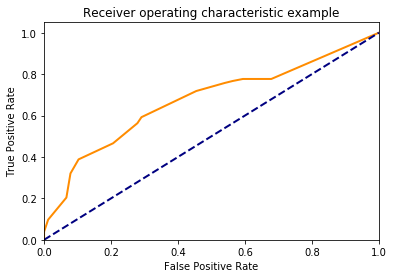

first three predicted probabilities:  [0.26639893325526043, 0.6397276973414572, 0.26692326009759565]
roc_auc_score:  0.672197705207414
Youden index:  0.3363556115352373
first three youden predicted results:  [0, 1, 0]
accuracy after apply youden index:  0.664179104477612


UnboundLocalError: local variable 'top_5_fea' referenced before assignment

In [167]:
roc_auc_analysis(best_svm_model, X_test, y_test)

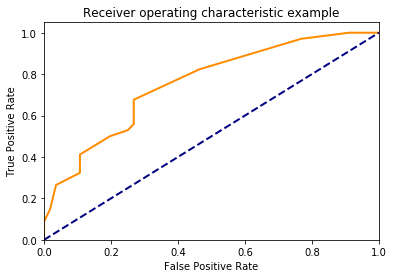

first three predicted probabilities:  [0.6676396256517755, 0.6968298379182969, 0.33652561296733047]
roc_auc_score:  0.7544642857142857
Youden index:  0.647002975738084
first three youden predicted results:  [1, 1, 0]
accuracy after apply youden index:  0.7111111111111111
top 5 features:  [('x0_1', 0.9584), ('x0_3', 0.0416), ('x0_2', 0.0), ('x1_0', 0.0)]


In [214]:
roc_auc_analysis(best_rf_model, X_test, y_test)

In [169]:
from sklearn.metrics import classification_report

predictions = best_svm_model.predict(X_test)
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.70      0.79      0.75       165
           1       0.59      0.47      0.52       103

   micro avg       0.67      0.67      0.67       268
   macro avg       0.64      0.63      0.63       268
weighted avg       0.66      0.67      0.66       268



In [170]:
from sklearn.metrics import confusion_matrix

predictions = best_svm_model.predict(X_test)

confusion_matrix(y_test, predictions)

array([[131,  34],
       [ 55,  48]], dtype=int64)

In [171]:
from sklearn.metrics import classification_report

predictions = best_rf_model.predict(X_test)
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       165
           1       0.54      0.60      0.57       103

   micro avg       0.65      0.65      0.65       268
   macro avg       0.64      0.64      0.64       268
weighted avg       0.66      0.65      0.66       268



In [185]:
from sklearn.metrics import confusion_matrix

predictions = best_rf_model.predict(X_test)

confusion_matrix(y_test, predictions)

array([[113,  52],
       [ 41,  62]], dtype=int64)

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}

In [188]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.7000


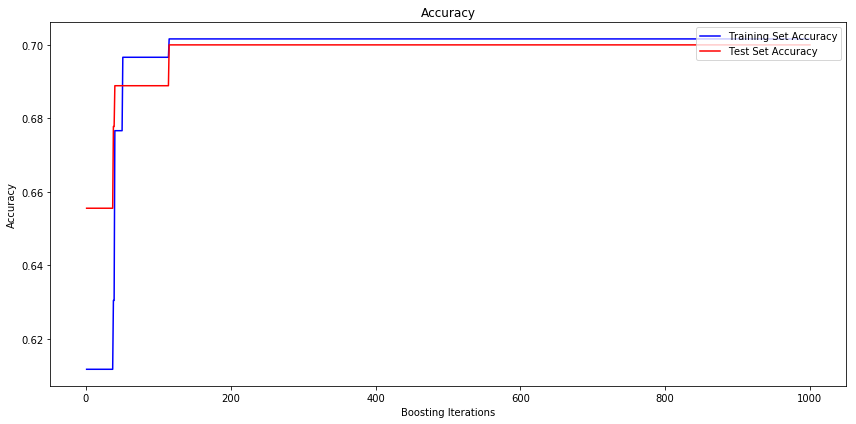

In [189]:
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    train_score[i] = accuracy_score(y_train, y_pred)

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = accuracy_score(y_test, y_pred)
    
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Accuracy') # Binomial deviance loss function for binary classification
plt.plot(np.arange(params['n_estimators']) + 1, train_score, 'b-', label='Training Set Accuracy')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()

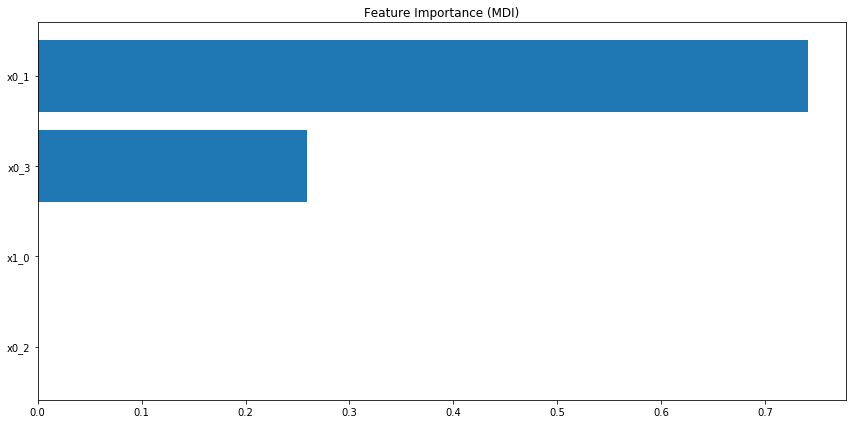

In [199]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

fig.tight_layout()
plt.show()

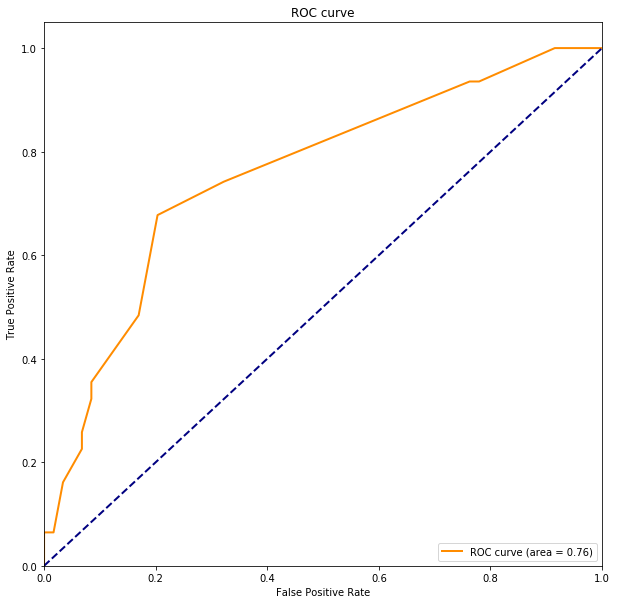

In [191]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1]) # real y & predicted y (based on "Sepal width")
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")
plt.show()

In [192]:
from sklearn.metrics import classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions)) # Precision, Recall, F1-score 등을 확인할 수 있습니다.

print("Accuracy on Training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(clf.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80        59
           1       0.67      0.26      0.37        31

   micro avg       0.70      0.70      0.70        90
   macro avg       0.69      0.60      0.59        90
weighted avg       0.69      0.70      0.65        90

Accuracy on Training set: 0.702
Accuracy on Test set: 0.700


In [206]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [201]:
offset = int(X.shape[0] * 0.9)
print(offset)

801


In [202]:
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [203]:
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

In [204]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [207]:
mse = mean_squared_error(y_train, model.predict(X_train))
print("MSE: {}".format(mse))

MSE: 0.1994981883460916


In [208]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: {}".format(mse))

MSE: 0.20347829820368346


In [209]:
params['n_estimators']

1000

In [210]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

ValueError: Unable to coerce to Series, length must be 1: given 90

IndexError: index 4 is out of bounds for axis 0 with size 4

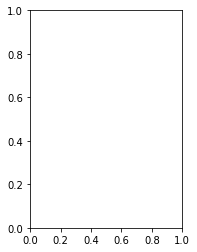

In [212]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_names)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# # roc_auc score and plot
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def plot_auc_roc(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {:0.4f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()

def get_Younden_idx(fpr, tpr, threshold):
    idx = np.argmax(np.abs(tpr-fpr))
    return threshold[idx]
    
def roc_auc_analysis(clf, dx, dy):
    
    preds = clf.predict_proba(dx)
    preds = list(map(lambda x: x[-1], preds))
    fpr, tpr, threshold = roc_curve(dy, preds)
    plot_auc_roc(fpr, tpr)
    print("first three predicted probabilities: ", preds[:3])
    print("roc_auc_score: ", roc_auc_score(dy, preds))
    J  = get_Younden_idx(fpr, tpr, threshold)
    print("Youden index: ", J)
    
    youden_preds = list(map(lambda x: 1 if x>=J else 0, preds))
    print("first three youden predicted results: ", youden_preds[:3])
    print("accuracy after apply youden index: ", accuracy_score(dy, youden_preds))
    
#     if isinstance(clf, LogisticRegression):
#         cof = clf.coef_.tolist()[0]
#         cof_idx = list(zip(cof, range(len(cof))))
#         top_5_fea = sorted(cof_idx, key=lambda x: abs(x[0]), reverse=True)[:5]
    if isinstance(clf, RandomForestClassifier):
        fea_imp = clf.feature_importances_
        top_5_fea = sorted(list(zip(fea_imp, range(len(fea_imp)))), key=lambda x: abs(x[0]), reverse=True)[:5]
  
    print("top 5 features: ", list(map(lambda x: (feature_names[x[1]], round(x[0], 4)), top_5_fea)))
